# Analyzing the skills in demand

## cleanup of the skill column 

In [2]:

import pandas as pd
from datasets import load_dataset
the_lukbarset=load_dataset('lukebarousse/data_jobs')
data_fram=the_lukbarset['train'].to_pandas()
data_fram['job_posted_date']=pd.to_datetime(data_fram.job_posted_date)
data_fram
data_fram1=data_fram.copy()
import ast
import matplotlib.pyplot as plt
import seaborn as sns


### Data specific to India

In [3]:
data_fram1=data_fram1[data_fram1['job_country']=='India']

### Conversion of the string into list 

In [4]:
# first we will check the type of the objects in job_skills column 
data_fram1['job_skills'].apply(type).value_counts() # so only string and none is there no other datatype
import ast
data_fram1['job_skills']=data_fram1['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill) # converting it into list


# conversion of the string into list 


## Top Skills required in the Indian Job Market for Data Analyst

### exploding the skills list

In [5]:
data_fram_india=data_fram1[data_fram1['job_country']=='India']
data_fram_india=data_fram_india.explode('job_skills') # getting inidvidual skills out of the list



### Skills which are in demand for Data Analytics in India

Text(0.5, 1.0, 'Skill counts')

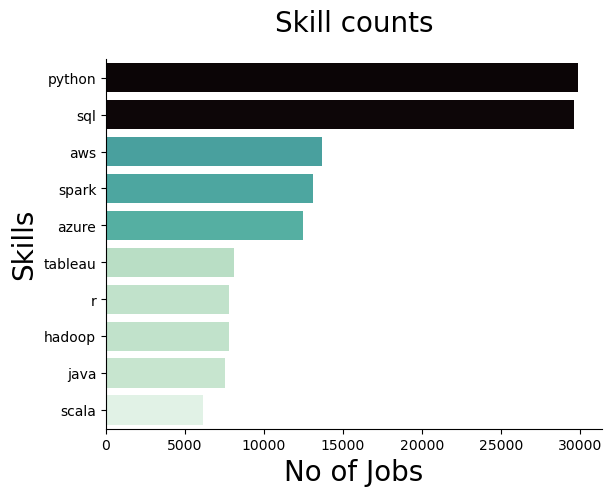

In [6]:
new_frame=data_fram_india['job_skills'].value_counts().head(10).reset_index()

sns.barplot(data=new_frame,x='count',y='job_skills',palette='mako_r',hue='count')
plt.legend().remove()
sns.despine()
plt.ylabel(ylabel='Skills',fontsize=20)
plt.xlabel(xlabel='No of Jobs',fontsize=20)
plt.title(label='Skill counts',pad=20,fontsize=20)



### Percentage share of each skill in the market

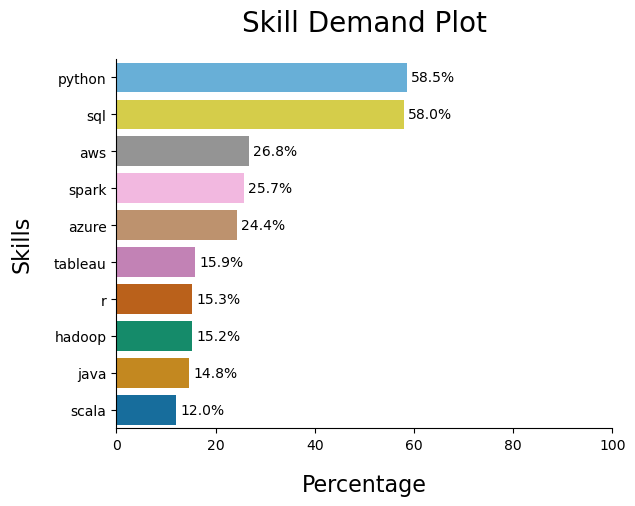

In [7]:
new_frame['total_jobs']=len(data_fram1[data_fram1['job_country']=='India'])
new_frame['percentage']=(new_frame['count']/new_frame['total_jobs'])*100
ax=sns.barplot(data=new_frame,y='job_skills',x='percentage',palette='colorblind',hue='percentage')
sns.despine()
plt.legend().remove()
plt.title(label='Skill Demand Plot',pad=20,fontsize=20,loc='center')
plt.ylabel(ylabel='Skills',fontsize=16,labelpad=15)
plt.xlabel(xlabel='Percentage',fontsize=16,labelpad=15)
plt.xlim(0,100)

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', padding=3)


,job_skills,count,total_jobs,percentage
0,python,29912,51088,58.549953
1,sql,29649,51088,58.035155
2,aws,13688,51088,26.792985
3,spark,13117,51088,25.675305
4,azure,12459,51088,24.387332
5,tableau,8113,51088,15.880442
6,r,7804,51088,15.275603
7,hadoop,7781,51088,15.230583
8,java,7536,51088,14.751018
9,scala,6147,51088,12.032180
